In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [63]:
df = pd.read_csv(r"C:\Users\mohd ali\OneDrive\Desktop\ds\football\players_data.csv")

In [64]:
df.head()

,NAME,AGE,OVA,POT,TEAM & CONTRACT,ID,HEIGHT,WEIGHT,FOOT,BOV,...,A/W,D/W,IR,BODY TYPE,PAC,SHO,PAS,DRI,DEF,PHY
0,B. Barcola\nRW ST RM,19,74,84,Olympique Lyonnais\n2020 ~ 2026,264652,"186cm / 6'1""",70kg / 154lbs,Right,75,...,High,Medium,1,Lean (185+),85,70,66,77,30,62
1,W. Endo\nCM CDM,29,79,79,VfB Stuttgart\n2020 ~ 2024,232487,"178cm / 5'10""",77kg / 170lbs,Right,79,...,Medium,High,2,Normal (170-185),63,66,71,79,79,75
2,M. Guendouzi\nCM CF,23,80,85,Olympique de Marseille\n2022 ~ 2025,236496,"185cm / 6'1""",68kg / 150lbs,Right,82,...,Medium,High,1,Lean (185+),76,69,78,78,74,80
3,B. Johnson\nRW ST,21,75,85,Nottingham Forest\n2019 ~ 2026,251421,"179cm / 5'10""",71kg / 157lbs,Right,76,...,High,Medium,1,Lean (170-185),88,72,67,77,41,57
4,M. Olise\nRW CAM RM,20,78,84,Crystal Palace\n2021 ~ 2026,247827,"178cm / 5'10""",68kg / 150lbs,Left,80,...,Medium,Medium,1,Lean (170-185),80,70,77,83,50,56


In [65]:
df.columns

Index(['NAME', 'AGE', 'OVA', 'POT', 'TEAM & CONTRACT', 'ID', 'HEIGHT',
       'WEIGHT', 'FOOT', 'BOV', 'BP', 'GROWTH', 'JOINED', 'LOAN DATE END',
       'VALUE', 'WAGE', 'RELEASE CLAUSE', 'ATTACKING', 'CROSSING', 'FINISHING',
       'HEADING ACCURACY', 'SHORT PASSING', 'VOLLEYS', 'SKILL', 'DRIBBLING',
       'CURVE', 'FK ACCURACY', 'LONG PASSING', 'BALL CONTROL', 'MOVEMENT',
       'ACCELERATION', 'SPRINT SPEED', 'AGILITY', 'REACTIONS', 'BALANCE',
       'POWER', 'SHOT POWER', 'JUMPING', 'STAMINA', 'STRENGTH', 'LONG SHOTS',
       'MENTALITY', 'AGGRESSION', 'INTERCEPTIONS', 'POSITIONING', 'VISION',
       'PENALTIES', 'COMPOSURE', 'DEFENDING', 'MARKING', 'STANDING TACKLE',
       'SLIDING TACKLE', 'GOALKEEPING', 'GK DIVING', 'GK HANDLING',
       'GK KICKING', 'GK POSITIONING', 'GK REFLEXES', 'TOTAL', 'BASE STATS',
       'W/F', 'SM', 'A/W', 'D/W', 'IR', 'BODY TYPE', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 'PHY'],
      dtype='object')

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 72 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   NAME              100 non-null    object
 1   AGE               100 non-null    int64 
 2   OVA               100 non-null    int64 
 3   POT               100 non-null    int64 
 4   TEAM & CONTRACT   100 non-null    object
 5   ID                100 non-null    int64 
 6   HEIGHT            100 non-null    object
 7   WEIGHT            100 non-null    object
 8   FOOT              100 non-null    object
 9   BOV               100 non-null    int64 
 10  BP                100 non-null    object
 11  GROWTH            100 non-null    int64 
 12  JOINED            100 non-null    object
 13  LOAN DATE END     4 non-null      object
 14  VALUE             100 non-null    object
 15  WAGE              100 non-null    object
 16  RELEASE CLAUSE    100 non-null    object
 17  ATTACKING        

In [67]:
df['NAME'] = df['NAME'].apply(lambda x: re.split("[a-z]\n", x)[0]).apply(lambda x: x.split('\n')[1] if len(x.split('\n'))>1 else x)
df.NAME

0         B. Barcol
1            W. End
2       M. Guendouz
3         B. Johnso
4           M. Olis
          ...      
95           T. Kub
96       Lee Kang I
97        J. Musial
98       Gabri Veig
99    A. Schjelderu
Name: NAME, Length: 100, dtype: object

In [68]:
columns = df.select_dtypes(include='object').columns.values
for col in columns:
    print('This print is for the column : '+ col)
    print(df[col])
    print('===========================')

This print is for the column : NAME
0         B. Barcol
1            W. End
2       M. Guendouz
3         B. Johnso
4           M. Olis
          ...      
95           T. Kub
96       Lee Kang I
97        J. Musial
98       Gabri Veig
99    A. Schjelderu
Name: NAME, Length: 100, dtype: object
This print is for the column : TEAM & CONTRACT
0         Olympique Lyonnais\n2020 ~ 2026
1              VfB Stuttgart\n2020 ~ 2024
2     Olympique de Marseille\n2022 ~ 2025
3          Nottingham Forest\n2019 ~ 2026
4             Crystal Palace\n2021 ~ 2026
                     ...                 
95             Real Sociedad\n2022 ~ 2027
96                  Mallorca\n2021 ~ 2025
97         FC Bayern München\n2020 ~ 2026
98             Celta de Vigo\n2019 ~ 2026
99                   Benfica\n2023 ~ 2028
Name: TEAM & CONTRACT, Length: 100, dtype: object
This print is for the column : HEIGHT
0      186cm / 6'1"
1     178cm / 5'10"
2      185cm / 6'1"
3     179cm / 5'10"
4     178cm / 5'10"
        

In [69]:
df['TEAM'] = df['TEAM & CONTRACT'].apply(lambda x: x.split('\n')[0])

In [70]:
df['CONTRACT'] = df['TEAM & CONTRACT'].apply(lambda x: x.split('\n')[1])

In [71]:
x = df.HEIGHT.apply(lambda x: 1 if 'cm' in x else 0)
x.unique()

array([1], dtype=int64)

In [86]:
df.HEIGHT.str.split(' / ')[0]

['186cm', '6\'1"']

In [75]:
df.HEIGHT.apply(lambda x: x.replace('cm',''))


0      186 / 6'1"
1     178 / 5'10"
2      185 / 6'1"
3     179 / 5'10"
4     178 / 5'10"
         ...     
95     173 / 5'8"
96     173 / 5'8"
97     184 / 6'0"
98     184 / 6'0"
99     176 / 5'9"
Name: HEIGHT, Length: 100, dtype: object

In [72]:
df['HEIGHT'] = df.HEIGHT.apply(lambda x: x.replace('cm','')).astype('float')
df.HEIGHT

ValueError: could not convert string to float: '186 / 6\'1"'

In [18]:
x = df.WEIGHT.apply(lambda x: 1 if 'kg' in x else 0)
x.unique()

array([1], dtype=int64)

In [19]:
df['WEIGHT'] = df.WEIGHT.apply(lambda x: x.replace('kg','')).astype('float')
df.WEIGHT

0     77.0
1     83.0
2     83.0
3     70.0
4     85.0
      ... 
95    77.0
96    75.0
97    86.0
98    73.0
99    78.0
Name: WEIGHT, Length: 100, dtype: float64

In [20]:
def parse_value(value):
    value = value.replace('€','')
    if 'M' in value:
        x = float(value.replace('M',''))
    elif 'K' in value:
        x = float(value.replace('K',''))/1000
    else:
        x = float(value)
    return x

In [21]:
df['VALUE'] = df.VALUE.apply(lambda x: parse_value(x))
df.VALUE

0     45.0
1      7.5
2     50.0
3      2.1
4     31.0
      ... 
95     2.8
96     1.2
97    17.0
98    49.5
99     3.1
Name: VALUE, Length: 100, dtype: float64

In [22]:
df['WAGE'] = df.WAGE.apply(lambda x: x.replace('€','').replace('K','')).astype(float)
df.WAGE

0      37.0
1      35.0
2      47.0
3       2.0
4      46.0
      ...  
95      3.0
96    700.0
97     34.0
98    150.0
99     34.0
Name: WAGE, Length: 100, dtype: float64

In [23]:
df['RELEASE CLAUSE'] = df['RELEASE CLAUSE'].apply(lambda x: parse_value(x))
df['RELEASE CLAUSE']

0      97.9
1      12.0
2     108.8
3       3.5
4      58.9
      ...  
95      4.2
96      3.4
97      0.0
98     95.3
99      0.0
Name: RELEASE CLAUSE, Length: 100, dtype: float64

In [24]:
df['BODY TYPE'].value_counts()

Normal (170-185)    31
Normal (185+)       23
Lean (170-185)      18
Unique              12
Lean (185+)         12
Lean (170-)          2
Stocky (170-185)     1
Normal (170-)        1
Name: BODY TYPE, dtype: int64

In [25]:
df.head()

,NAME,AGE,OVA,POT,TEAM & CONTRACT,ID,HEIGHT,WEIGHT,FOOT,BOV,...,IR,BODY TYPE,PAC,SHO,PAS,DRI,DEF,PHY,TEAM,CONTRACT
0,A. Isa,21,82,86,Real Sociedad\n2019 ~ 2026,233731,192.0,77.0,Right,84,...,2,Unique,84,82,69,80,29,69,Real Sociedad,2019 ~ 2026
1,J. Gbami,25,76,76,PFC CSKA Moscow\n2019 ~ 2024,214947,186.0,83.0,Right,76,...,1,Normal (185+),73,57,72,73,76,74,PFC CSKA Moscow,2019 ~ 2024
2,Merin,25,83,87,Real Sociedad\n2018 ~ 2025,225193,189.0,83.0,Left,85,...,1,Normal (185+),74,78,81,82,82,81,Real Sociedad,2018 ~ 2025
3,L. Dickman,23,70,74,SPAL\n2019 ~ 2022,229456,177.0,70.0,Right,70,...,1,Normal (170-185),70,47,58,67,68,62,SPAL,2019 ~ 2022
4,E. Tapsob,22,80,86,Bayer 04 Leverkusen\n2020 ~ 2026,247263,194.0,85.0,Right,82,...,2,Normal (185+),73,54,65,69,82,79,Bayer 04 Leverkusen,2020 ~ 2026


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 74 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NAME              100 non-null    object 
 1   AGE               100 non-null    int64  
 2   OVA               100 non-null    int64  
 3   POT               100 non-null    int64  
 4   TEAM & CONTRACT   100 non-null    object 
 5   ID                100 non-null    int64  
 6   HEIGHT            100 non-null    float64
 7   WEIGHT            100 non-null    float64
 8   FOOT              100 non-null    object 
 9   BOV               100 non-null    int64  
 10  BP                100 non-null    object 
 11  GROWTH            100 non-null    int64  
 12  JOINED            100 non-null    object 
 13  LOAN DATE END     5 non-null      object 
 14  VALUE             100 non-null    float64
 15  WAGE              100 non-null    float64
 16  RELEASE CLAUSE    100 non-null    float64
 17

In [27]:
df = df.drop(['ID', 'TEAM & CONTRACT', 'CONTRACT', 'LOAN DATE END', 'JOINED', 'W/F', 'SM', 'A/W', 'D/W', 'BODY TYPE'], axis=1)

In [29]:
player_list= pd.read_csv(r"C:\Users\mohd ali\OneDrive\Desktop\ds\football\player_list.csv")

In [30]:
player_list.shape

(17779, 64)

In [33]:
player_list.head()

,Name,Age,Overall,Potential,Team,Height,Weight,Foot,Best_Overall,Position,...,GK_Reflexes,Total_Stats,Base_Stats,Int_Reputation,PAC,SHO,PAS,DRI,DEF,PHY
0,Z. Ibrahimović,37,85,85,Milan,196.0,95.0,Right,85,ST,...,12,2009,411,5,55,88,77,79,34,78
1,A. Kanno,29,62,62,Al Fayha,180.0,67.0,Right,62,CB,...,12,1453,314,1,59,28,45,53,61,68
2,Brahim,19,74,86,Real Madrid,170.0,68.0,Left,75,CAM,...,6,1699,362,1,76,68,65,82,29,42
3,M. Aarons,19,73,85,Norwich City,178.0,73.0,Right,74,RB,...,8,1769,396,1,82,41,61,74,70,68
4,J. David,19,77,88,KAA Gent,178.0,77.0,Right,79,ST,...,7,1829,400,1,86,76,69,78,25,66


In [34]:
df.describe()

,AGE,OVA,POT,HEIGHT,WEIGHT,BOV,GROWTH,VALUE,WAGE,RELEASE CLAUSE,...,GK REFLEXES,TOTAL,BASE STATS,IR,PAC,SHO,PAS,DRI,DEF,PHY
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.00000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,21.900000,77.010000,84.020000,181.590000,74.150000,78.570000,7.010000,28.170750,76.240000,53.626000,...,10.610000,1937.860000,417.220000,1.55000,77.20000,66.170000,69.940000,76.510000,56.950000,70.450000
std,3.494585,5.756849,4.911294,6.893263,7.579045,5.756428,5.032209,26.750058,143.161075,54.984862,...,6.655893,193.382283,34.884102,0.79614,9.33658,12.674682,8.492207,7.773946,19.135548,8.656608
min,16.000000,61.000000,72.000000,168.000000,58.000000,64.000000,0.000000,0.775000,1.000000,0.000000,...,5.000000,1092.000000,320.000000,1.00000,50.00000,30.000000,47.000000,51.000000,19.000000,42.000000
25%,19.000000,73.750000,80.000000,176.000000,68.000000,75.000000,3.000000,5.875000,15.750000,11.200000,...,8.000000,1847.000000,396.750000,1.00000,72.00000,59.750000,65.000000,72.750000,39.000000,64.750000
50%,21.000000,78.000000,85.000000,181.000000,75.000000,80.000000,7.000000,23.250000,35.000000,39.400000,...,10.000000,1970.000000,422.000000,1.00000,76.50000,69.000000,72.000000,78.000000,61.000000,72.500000
75%,24.000000,81.000000,88.000000,187.000000,78.250000,82.250000,10.000000,39.125000,71.000000,77.250000,...,13.000000,2071.250000,440.000000,2.00000,84.00000,75.250000,76.000000,82.000000,74.250000,77.000000
max,34.000000,92.000000,94.000000,204.000000,100.000000,93.000000,24.000000,143.500000,950.000000,272.700000,...,70.000000,2246.000000,478.000000,5.00000,95.00000,91.000000,91.000000,95.000000,84.000000,88.000000


In [35]:
df.columns

Index(['NAME', 'AGE', 'OVA', 'POT', 'HEIGHT', 'WEIGHT', 'FOOT', 'BOV', 'BP',
       'GROWTH', 'VALUE', 'WAGE', 'RELEASE CLAUSE', 'ATTACKING', 'CROSSING',
       'FINISHING', 'HEADING ACCURACY', 'SHORT PASSING', 'VOLLEYS', 'SKILL',
       'DRIBBLING', 'CURVE', 'FK ACCURACY', 'LONG PASSING', 'BALL CONTROL',
       'MOVEMENT', 'ACCELERATION', 'SPRINT SPEED', 'AGILITY', 'REACTIONS',
       'BALANCE', 'POWER', 'SHOT POWER', 'JUMPING', 'STAMINA', 'STRENGTH',
       'LONG SHOTS', 'MENTALITY', 'AGGRESSION', 'INTERCEPTIONS', 'POSITIONING',
       'VISION', 'PENALTIES', 'COMPOSURE', 'DEFENDING', 'MARKING',
       'STANDING TACKLE', 'SLIDING TACKLE', 'GOALKEEPING', 'GK DIVING',
       'GK HANDLING', 'GK KICKING', 'GK POSITIONING', 'GK REFLEXES', 'TOTAL',
       'BASE STATS', 'IR', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'TEAM'],
      dtype='object')

<Axes: xlabel='AGE', ylabel='Count'>

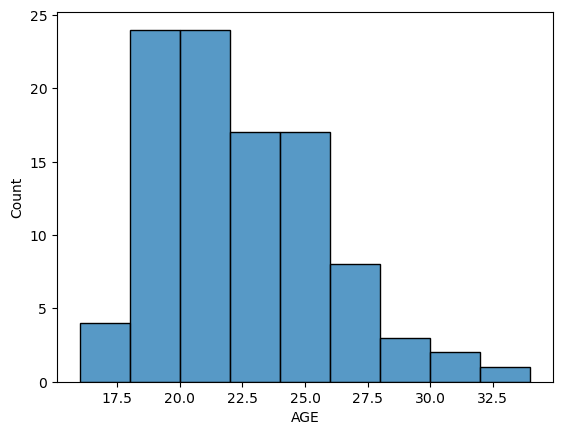

In [40]:
sns.histplot(df.AGE)

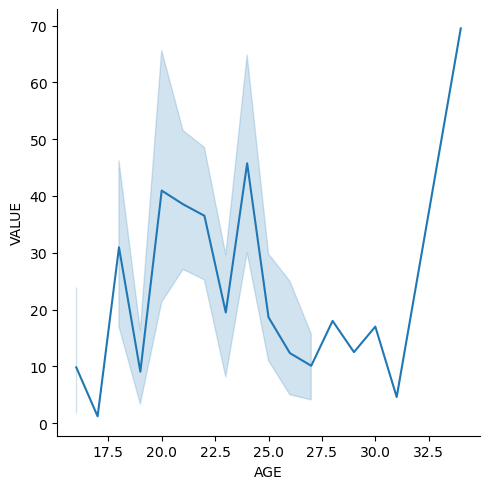

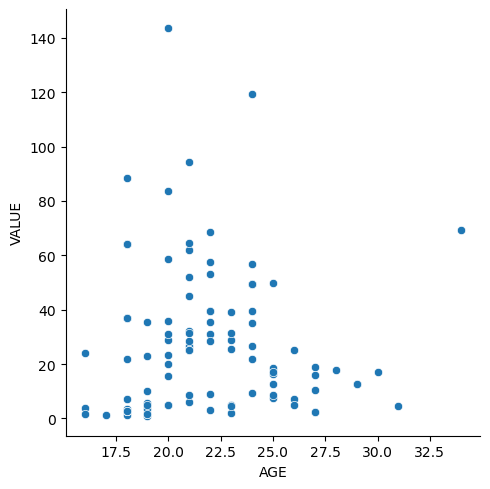

In [48]:
sns.relplot(x='AGE', y='VALUE', kind='line', data=df)
sns.relplot(x='AGE', y='VALUE', data=df)

In [50]:
df.nlargest(5,columns='VALUE')[['NAME','TEAM','VALUE']]

,NAME,TEAM,VALUE
69,E. Haalan,Borussia Dortmund,143.5
32,F. de Jon,FC Barcelona,119.5
91,P. Fode,Manchester City,94.5
53,Pedr,FC Barcelona,88.5
50,LW,Real Madrid CF,83.5


In [57]:
df.columns

Index(['NAME', 'AGE', 'OVA', 'POT', 'HEIGHT', 'WEIGHT', 'FOOT', 'BOV', 'BP',
       'GROWTH', 'VALUE', 'WAGE', 'RELEASE CLAUSE', 'ATTACKING', 'CROSSING',
       'FINISHING', 'HEADING ACCURACY', 'SHORT PASSING', 'VOLLEYS', 'SKILL',
       'DRIBBLING', 'CURVE', 'FK ACCURACY', 'LONG PASSING', 'BALL CONTROL',
       'MOVEMENT', 'ACCELERATION', 'SPRINT SPEED', 'AGILITY', 'REACTIONS',
       'BALANCE', 'POWER', 'SHOT POWER', 'JUMPING', 'STAMINA', 'STRENGTH',
       'LONG SHOTS', 'MENTALITY', 'AGGRESSION', 'INTERCEPTIONS', 'POSITIONING',
       'VISION', 'PENALTIES', 'COMPOSURE', 'DEFENDING', 'MARKING',
       'STANDING TACKLE', 'SLIDING TACKLE', 'GOALKEEPING', 'GK DIVING',
       'GK HANDLING', 'GK KICKING', 'GK POSITIONING', 'GK REFLEXES', 'TOTAL',
       'BASE STATS', 'IR', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'TEAM'],
      dtype='object')

In [59]:
df.nlargest(5,columns='OVA')[['NAME','TEAM','OVA']]

,NAME,TEAM,OVA
42,L. Mess,Paris Saint-Germain,92
69,E. Haalan,Borussia Dortmund,88
32,F. de Jon,FC Barcelona,87
20,Y. Tieleman,Leicester City,84
50,LW,Real Madrid CF,84


<Axes: xlabel='OVA', ylabel='VALUE'>

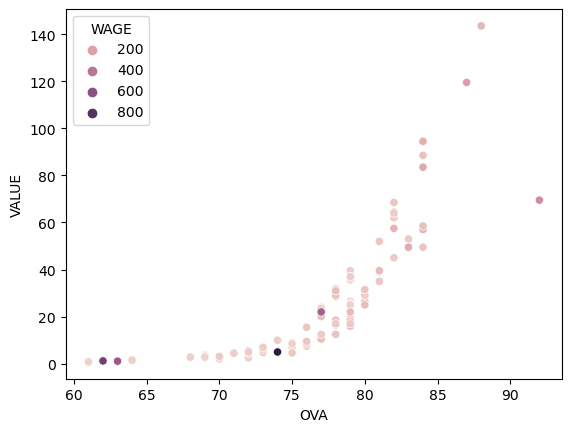

In [60]:
sns.scatterplot(data=df, x="OVA", y="VALUE", hue="WAGE")

In [61]:
def run_model(algo,X,y,cv):
    model = algo.fit(X,y)
    acc = round(model.score(X,y)*100,2)
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X, 
                                                  y, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    
    acc_cv = round(metrics.accuracy_score(y, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv